In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from sklearn.metrics import confusion_matrix
import random
from scipy.stats import ttest_rel
from itertools import combinations
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multitest import multipletests
from scipy.stats import boxcox



from load_data import *
from assumption_tests import *
from models import *
from statistical_tests import *

evaluate = False


In [6]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [7]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [8]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [9]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [10]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [11]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [12]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [13]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [14]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [15]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [16]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [17]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [18]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [19]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [20]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [21]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [22]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [23]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [24]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [25]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [26]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [27]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [28]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [29]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [30]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [31]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [32]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [33]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [34]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [35]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [36]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [37]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [38]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [39]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [40]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [41]:
hr_data.describe()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000
mean,76.009226,74.821458,6.041234,67.422679,89.062024,23398.551815,2.500000,2.000000,7.50000,0.500000,2.291667,1.428571
std,7.501301,8.101459,4.267282,7.042010,12.764559,3589.600223,1.121376,0.818938,4.04318,0.501495,1.924796,0.496351
min,57.341463,54.130000,0.844255,52.180000,70.150000,15975.450000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000
25%,70.952240,70.175000,3.092851,62.645000,79.752500,20805.553750,1.750000,1.000000,4.00000,0.000000,1.000000,1.000000
50%,75.618503,74.625000,4.678773,67.540000,87.355000,22493.687500,2.500000,2.000000,7.50000,0.500000,2.000000,1.000000
75%,80.308459,79.010000,7.281001,71.922500,94.682500,25645.200000,3.250000,3.000000,11.00000,1.000000,4.000000,2.000000
max,96.159341,94.880000,21.880307,82.680000,137.670000,35299.460000,4.000000,3.000000,14.00000,1.000000,8.000000,2.000000


In [42]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hr_data_scaled = scaler.fit_transform(hr_data)
hr_data_scaled = pd.DataFrame(hr_data_scaled, columns=hr_data.columns)

scaled_hr = pd.concat([hr_data_scaled.iloc[:, :6], hr_data.iloc[:, -6:]], axis=1)
scaled_hr.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0.261529,0.393515,-0.633659,0.827134,-0.447257,-0.132333,3,3,1,1,1,1
1,-0.672305,-0.526346,-0.828136,-0.043110,-0.851924,-0.410224,3,2,1,1,5,1
2,-0.352626,-0.180934,-0.653808,0.065136,-0.694772,-0.489387,3,1,1,1,0,1
3,0.388771,0.378658,-0.466943,0.697523,-0.325464,0.519811,2,3,1,1,1,1
4,0.175560,-0.033608,0.001497,0.441150,0.085489,0.137476,2,2,1,1,5,1


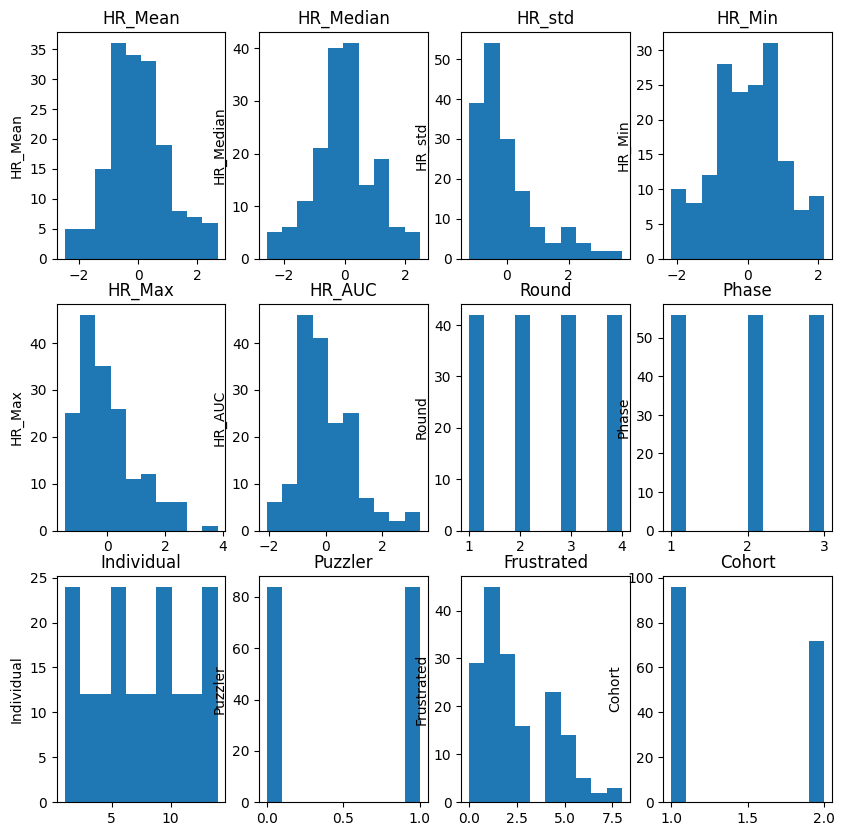

In [43]:
standardized = True
tmp = hr_data
if standardized:
    tmp = scaled_hr
plt.figure(figsize=(10, 10))
for i in range(len(tmp.columns)):
    plt.subplot(3, 4, i + 1)
    plt.title(tmp.columns[i])
    plt.ylabel(tmp.columns[i])
    plt.hist(tmp[tmp.columns[i]])
plt.show()

# Normality tests and transformations
- Violates independence assumption


In [44]:
groups = [scaled_hr['HR_Mean'], scaled_hr['HR_Median'], scaled_hr['HR_std'], scaled_hr['HR_Min'], scaled_hr['HR_Max'], scaled_hr['HR_AUC']]

test = True

if test:

    shapiro_normality_test(groups)

    '''
    Normality test results:
    - HR_mean is normal
    - HR_median is normal
    - HR_std is not normal
    - HR_min is normal
    - HR_max is not normal
    - HR_AUC is not normal
    '''


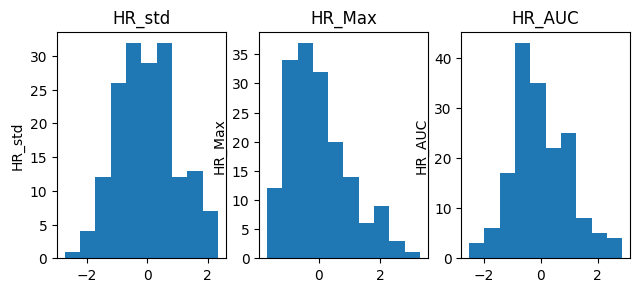

In [45]:
# Apply log transforms on non-normal columns:

# Select the columns you want to apply the log transform to
columns_to_transform = ['HR_std', 'HR_Max', 'HR_AUC']

# Apply the log transform to the selected columns
log_transformed_data = np.log(hr_data[columns_to_transform])

# Create a new DataFrame with the log-transformed data
log_transformed_df = pd.DataFrame(log_transformed_data, columns=columns_to_transform)

log_hr_data_scaled = scaler.fit_transform(log_transformed_df)
log_hr_data_scaled = pd.DataFrame(log_hr_data_scaled, columns=log_transformed_df.columns)

standardized = True
tmp = hr_data
if standardized:
    tmp = log_hr_data_scaled
plt.figure(figsize=(10, 10))
for i in range(len(tmp.columns)):
    plt.subplot(3, 4, i + 1)
    plt.title(tmp.columns[i])
    plt.ylabel(tmp.columns[i])
    plt.hist(tmp[tmp.columns[i]])
plt.show()

#Apply normality tests: 

test = True

if test:

    groups = [log_hr_data_scaled['HR_std'], log_hr_data_scaled['HR_Max'], log_hr_data_scaled['HR_AUC']]
    shapiro_normality_test(groups)

    '''
    Normality test results:
    - HR_std is normal
    - HR_Max is not normal
    - HR_AUC is not normal
    '''

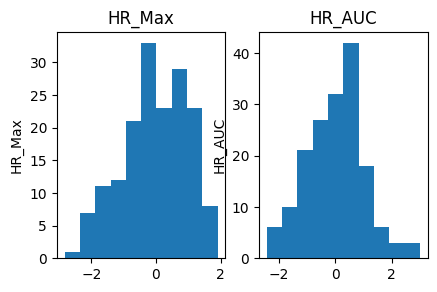

In [46]:
# Apply inverse transforms on non-normal columns:

# Select the columns you want to apply the inverse transform to
columns_to_transform = ['HR_Max', 'HR_AUC']

# Apply the inverse transform to the selected columns
inverse_transformed_data = 1 / hr_data[columns_to_transform]

# Create a new DataFrame with the log-transformed data
inverse_transformed_df = pd.DataFrame(inverse_transformed_data, columns=columns_to_transform)

inverse_hr_data_scaled = scaler.fit_transform(inverse_transformed_df)
inverse_hr_data_scaled = pd.DataFrame(inverse_hr_data_scaled, columns=inverse_transformed_df.columns)

standardized = True
tmp = hr_data
if standardized:
    tmp = inverse_hr_data_scaled
plt.figure(figsize=(10, 10))
for i in range(len(tmp.columns)):
    plt.subplot(3, 4, i + 1)
    plt.title(tmp.columns[i])
    plt.ylabel(tmp.columns[i])
    plt.hist(tmp[tmp.columns[i]])
plt.show()

#Apply normality tests: 

test = True

if test:

    groups = [inverse_hr_data_scaled['HR_Max'], inverse_hr_data_scaled['HR_AUC']]
    shapiro_normality_test(groups)

    '''
    Normality test results:
    - HR_Max is not normal
    - HR_AUC is normal
    '''

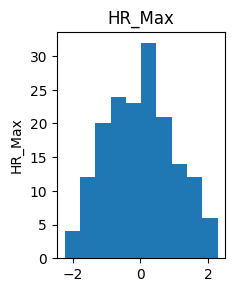

In [47]:
from scipy import stats

# Select the columns you want to apply the Box-Cox transform to
columns_to_transform = ['HR_Max']

# Apply the Box-Cox transform to the selected columns
boxcox_transformed_data, _ = boxcox(hr_data['HR_Max'])

# Create a new DataFrame with the Box-Cox transformed data
boxcox_transformed_df = pd.DataFrame(boxcox_transformed_data, columns=columns_to_transform)

boxcox_hr_data_scaled = scaler.fit_transform(boxcox_transformed_df)
boxcox_hr_data_scaled = pd.DataFrame(boxcox_hr_data_scaled, columns=boxcox_transformed_df.columns)

standardized = True
tmp = hr_data
if standardized:
    tmp = boxcox_hr_data_scaled
plt.figure(figsize=(10, 10))
for i in range(len(tmp.columns)):
    plt.subplot(3, 4, i + 1)
    plt.title(tmp.columns[i])
    plt.ylabel(tmp.columns[i])
    plt.hist(tmp[tmp.columns[i]])
plt.show()

# Apply normality tests:

test = True

if test:
    groups = [boxcox_hr_data_scaled['HR_Max']]
    shapiro_normality_test(groups)

    '''
    Normality test results:
    - HR_std is normal
    - HR_Max is not normal
    - HR_AUC is not normal
    '''

# Variance testing
- Assumptions violated: independence

In [48]:
groups = [hr_data['HR_Mean'], hr_data['HR_Median'], hr_data['HR_std'], hr_data['HR_Min'], hr_data['HR_Max'], hr_data['HR_AUC']]

groups_scaled = [scaled_hr['HR_Mean'], scaled_hr['HR_Median'], scaled_hr['HR_std'], scaled_hr['HR_Min'], scaled_hr['HR_Max'], scaled_hr['HR_AUC']]

test = True

if test:
    print('Non-scaled:')
    levene_variance_test(groups)

    print('Scaled:')
    levene_variance_test(groups_scaled)

    '''
    Variance test results:
    non-scaled not equal
    scaled is equal
    '''


Non-scaled:
Scaled:


# Ideas for exploratory task (All with HR variables as input data to predict some response variable):

- Make models that predict which round you are in, under the assumption that there might be carry-over or build up of heart rate metrics across rounds
    - Both as a classifier (categorical rounds) and as a regression model (since the rounds might have cardinal data tendencies and not only ordinal)
    - Apply independence tests to even see if there is a difference 

- Make models that predict which round you are in, under the assumption that heart rates might be elevated or at least different in resting phases from competitive phases
    - Only as a classifier, although there might be a polynomial relationship between phases (low beginning, high at puzzling, and low again at resting)
    - Apply independence test on HR variables to see if there is a difference at all


In [49]:
# Overall tasks:
# TODO Test for normality done
# TODO Test for variance done
# TODO Predict Round done
# TODO predict Phase done
# TODO pytorch classifier on Round done
# TODO pytorch classifier on Phase done

# TODO independence test on Rounds
# TODO independence test on Phase

concatenated_df = pd.concat([log_hr_data_scaled['HR_std'], inverse_hr_data_scaled['HR_AUC'], boxcox_hr_data_scaled['HR_Max'], scaled_hr[['HR_Mean', 'HR_Median', 'HR_Min']]], axis=1)
transformed_df = pd.concat([concatenated_df.iloc[:, :6], hr_data.iloc[:, -6:]], axis=1)

transformed = True

dataset = scaled_hr

if transformed:
    dataset = transformed_df


dataset['Round_category'] = dataset['Round'].astype('category')
dataset['Phase_category'] = dataset['Phase'].astype('category')

# Round Multinomial Logistic Regression

In [50]:
# Define the features (independent variables) and target (dependent variable)
X = dataset[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Max', 'HR_AUC', 'HR_Min']]
y = dataset['Round_category']

# Add constant term to the features
X = sm.add_constant(X)

# Create and fit the multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Print the summary of the multinomial logistic regression model
print(result.summary())
'''
# Performing ANOVA
anova_model = ols('HR_Mean ~ C(Frustrated_category)', data=hr_data).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

anova_results

Results: 
Optimization terminated successfully.
         Current function value: 1.246156
         Iterations 6
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Round   No. Observations:                  168
Model:                        MNLogit   Df Residuals:                      150
Method:                           MLE   Df Model:                           15
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.1011
Time:                        10:30:12   Log-Likelihood:                -209.35
converged:                       True   LL-Null:                       -232.90
Covariance Type:            nonrobust   LLR p-value:                 3.566e-05
==============================================================================
   Round=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2462      0.252      0.979      0.328      -0.247       0.739
HR_Mean        0.6263      1.711      0.366      0.714      -2.727       3.980
HR_Median      0.1127      1.346      0.084      0.933      -2.526       2.751
HR_std         0.6590      0.768      0.858      0.391      -0.846       2.164
HR_Max        -0.7039      1.107     -0.636      0.525      -2.875       1.467
HR_AUC        -1.2538      0.386     -3.249      0.001      -2.010      -0.498
------------------------------------------------------------------------------
   Round=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1161      0.268      0.433      0.665      -0.410       0.642
HR_Mean       -0.2376      1.866     -0.127      0.899      -3.894       3.419
HR_Median      0.7219      1.503      0.480      0.631      -2.224       3.668
HR_std         0.0264      0.810      0.033      0.974      -1.562       1.614
HR_Max        -0.0854      1.116     -0.076      0.939      -2.273       2.103
HR_AUC        -1.6277      0.473     -3.441      0.001      -2.555      -0.701
------------------------------------------------------------------------------
   Round=4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1343      0.264      0.508      0.611      -0.383       0.652
HR_Mean        1.4291      1.827      0.782      0.434      -2.151       5.009
HR_Median     -0.2457      1.400     -0.175      0.861      -2.989       2.498
HR_std         1.3552      0.809      1.675      0.094      -0.230       2.941
HR_Max        -1.6697      1.182     -1.413      0.158      -3.985       0.646
HR_AUC        -1.6252      0.464     -3.501      0.000      -2.535      -0.715
==============================================================================

'''





Optimization terminated successfully.
         Current function value: 1.244996
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:         Round_category   No. Observations:                  168
Model:                        MNLogit   Df Residuals:                      147
Method:                           MLE   Df Model:                           18
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.1019
Time:                        10:53:48   Log-Likelihood:                -209.16
converged:                       True   LL-Null:                       -232.90
Covariance Type:            nonrobust   LLR p-value:                 0.0001800
Round_category=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3000      0.259      1.159      0.247      -0.207       0.808
HR_Mean    

"\n# Performing ANOVA\nanova_model = ols('HR_Mean ~ C(Frustrated_category)', data=hr_data).fit()\nanova_results = sm.stats.anova_lm(anova_model, typ=2)\n\nanova_results\n\nResults: \nOptimization terminated successfully.\n         Current function value: 1.246156\n         Iterations 6\n                          MNLogit Regression Results                          \n==============================================================================\nDep. Variable:                  Round   No. Observations:                  168\nModel:                        MNLogit   Df Residuals:                      150\nMethod:                           MLE   Df Model:                           15\nDate:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.1011\nTime:                        10:30:12   Log-Likelihood:                -209.35\nconverged:                       True   LL-Null:                       -232.90\nCovariance Type:            nonrobust   LLR p-value:                 3.5

# Phase Multinomial Linear regression

In [51]:
# Define the features (independent variables) and target (dependent variable)
X = dataset[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Max', 'HR_AUC', 'HR_Min']]
y = dataset['Phase_category']

# Add constant term to the features
X = sm.add_constant(X)

# Create and fit the multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Print the summary of the multinomial logistic regression model
print(result.summary())


'''
Optimization terminated successfully.
         Current function value: 1.007768
         Iterations 6
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         Phase_category   No. Observations:                  168
Model:                        MNLogit   Df Residuals:                      156
Method:                           MLE   Df Model:                           10
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.08269
Time:                        10:44:23   Log-Likelihood:                -169.30
converged:                       True   LL-Null:                       -184.57
Covariance Type:            nonrobust   LLR p-value:                 0.0007029
====================================================================================
Phase_category=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1387      0.210     -0.659      0.510      -0.551       0.274
HR_Mean              2.7603      1.669      1.654      0.098      -0.511       6.032
HR_Median           -1.0571      1.259     -0.840      0.401      -3.525       1.411
HR_std               1.5085      0.717      2.105      0.035       0.104       2.913
HR_Max              -2.4784      1.100     -2.253      0.024      -4.634      -0.323
HR_AUC               0.3683      0.249      1.479      0.139      -0.120       0.856
------------------------------------------------------------------------------------
Phase_category=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0539      0.203     -0.266      0.790      -0.451       0.344
HR_Mean              2.6905      1.502      1.791      0.073      -0.254       5.635
HR_Median           -2.3464      1.290     -1.819      0.069      -4.875       0.182
HR_std              -0.2272      0.681     -0.333      0.739      -1.563       1.108
HR_Max              -0.5507      0.856     -0.643      0.520      -2.229       1.127
HR_AUC              -0.2134      0.292     -0.730      0.465      -0.787       0.360
====================================================================================

'''

Optimization terminated successfully.
         Current function value: 0.966026
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:         Phase_category   No. Observations:                  168
Model:                        MNLogit   Df Residuals:                      154
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.1207
Time:                        10:53:48   Log-Likelihood:                -162.29
converged:                       True   LL-Null:                       -184.57
Covariance Type:            nonrobust   LLR p-value:                 1.231e-05
Phase_category=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2470      0.224     -1.100      0.271      -0.687       0.193
HR_Mean    

'\nOptimization terminated successfully.\n         Current function value: 1.007768\n         Iterations 6\n                          MNLogit Regression Results                          \n==============================================================================\nDep. Variable:         Phase_category   No. Observations:                  168\nModel:                        MNLogit   Df Residuals:                      156\nMethod:                           MLE   Df Model:                           10\nDate:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.08269\nTime:                        10:44:23   Log-Likelihood:                -169.30\nconverged:                       True   LL-Null:                       -184.57\nCovariance Type:            nonrobust   LLR p-value:                 0.0007029\n====================================================================================\nPhase_category=2       coef    std err          z      P>|z|      [0.025      0.975]\n

# Interpretation of multinomial outputs:

- Dep. Variable: The dependent variable in the regression, which is "Round." This indicates that you are predicting the different rounds of an event.

- No. Observations: The number of observations or data points used in the regression, which is 168 in this case.

- Model: The type of model used, which is "MNLogit" for multinomial logistic regression.

- Df Residuals: The degrees of freedom of the residuals, which is 150. It represents the difference between the number of observations and the number of parameters estimated.

- Method: The estimation method used, which is "MLE" (Maximum Likelihood Estimation).

- Date and Time: The date and time when the regression was performed.

- Converged: Indicates whether the optimization process converged successfully. In this case, it shows that the optimization terminated successfully.

- Log-Likelihood: The log-likelihood of the model, which measures how well the model fits the data. A higher log-likelihood indicates a better fit.

- Pseudo R-squared: A measure of the goodness-of-fit of the model, similar to R-squared in linear regression. In this case, the pseudo R-squared is 0.1011, 
indicating that the model explains about 10.11% of the variation in the outcome.

- LL-Null: The log-likelihood of a null model with no predictors. It serves as a baseline to compare the model's fit.

- Covariance Type: The type of covariance used in estimating the standard errors. In this case, it is "nonrobust."

- LLR p-value: The p-value of the likelihood ratio test, which compares the likelihood of the current model to a reduced model. 
A significant p-value suggests that the model significantly improves the fit compared to the reduced model.


- The table is then divided into sections for each level of the dependent variable (Round 2, Round 3, and Round 4). For each level, the table provides the coefficients, 
standard errors, z-values, p-values, and confidence intervals for the independent variables (HR_Mean, HR_Median, HR_std, HR_Max, HR_AUC), along with a constant term (const).

- To interpret the results, you can focus on the coefficients and their corresponding p-values. Significant coefficients (p-value < 0.05) indicate that the corresponding independent 
variable has a statistically significant impact on the probability of the specific round. The sign of the coefficient (+/-) indicates the direction of the relationship, 
while the magnitude of the coefficient represents the magnitude of the effect.

- For example, in Round 2, the HR_AUC variable has a coefficient of -1.2538 with a p-value of 0.001. This suggests that a one-unit increase in HR_AUC is associated with a decrease in the 
log-odds of being in Round 2 by 1.2538 units, controlling for the other variables.

- You can similarly interpret the coefficients and p-values for the other rounds and variables in the table.

- Keep in mind that these interpretations are based on the assumption that the model assumptions are met, and appropriate preprocessing and model selection steps have been performed.

# Phase Classifier

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = dataset[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Max', 'HR_AUC', 'HR_Min']]
y = dataset['Phase_category']

# Convert X and y to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.long).to(device)

# Create a TensorDataset
tensor_dataset = TensorDataset(X_tensor, y_tensor)

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(6, 64)  
        self.fc2 = nn.Linear(64, len(set(y_tensor.tolist()))+1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x


In [53]:
criterion = nn.CrossEntropyLoss().to(device)

num_epochs = 50

In [54]:
random.seed(10)

random_numbers = random.sample(range(1,101), 50)

if evaluate:
    
    num_tests = 30

    label_predicted = []
    label_correct = []
    accuracies = []

    for i in range(num_tests):
        predictions = []
        torch.manual_seed(random_numbers[i])

        for i in range(len(tensor_dataset)):
            model = Classifier().to(device)
            optimizer = optim.SGD(model.parameters(), lr=0.1)
            model.train()
            train_indices = list(range(i)) + list(range(i+1, len(tensor_dataset)))
            test_indices = [i]

            train_dataset = Subset(tensor_dataset, train_indices)
            test_dataset = Subset(tensor_dataset, test_indices)

            train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

            for epoch in range(num_epochs):
                for inputs, labels in train_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            model.eval()
            test_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    outputs = model(inputs)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    test_loss += criterion(outputs, labels).item()
                    predictions.append(correct)

            label_predicted.append(predicted.item())
            label_correct.append(labels.item())

            train_loss = loss.item()
            test_loss /= len(test_loader)
            accuracy = correct / total * 100.0
            print(f"Sample {i}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

        final_accuracy = sum(predictions) / len(predictions) * 100.0
        accuracies.append(final_accuracy)

        print(f"Final Accuracy: {final_accuracy:.2f}%")

    final_cm = confusion_matrix(label_predicted, label_correct)
    # Assuming you have a confusion matrix called 'final_cm'
    labels = ['Phase 1', 'Phase 2', 'Phase 3']  # Replace with your actual class labels

    # Calculate the sum of each row in the confusion matrix
    row_sum = np.sum(final_cm, axis=1, keepdims=True)

    # Calculate the percentages by dividing each cell by the corresponding row sum
    percentages = np.round(final_cm / row_sum * 100, 2)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create heatmap using matshow
    heatmap = ax.matshow(percentages, cmap='RdBu')

    # Set labels for x-axis and y-axis
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add colorbar
    cbar = plt.colorbar(heatmap)

    # Add a title
    plt.title('Confusion Matrix (Percentages)')

    # Add labels to each cell in the heatmap
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{percentages[i, j]}%', ha='center', va='center', color='black')

    # Add labels indicating predicted and correct on the overall x-axis and y-axis
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Correct")

    # Show the plot
    plt.show()
    print(f"Final Accuracies: {accuracies}")
    print(f"Average Accuracy: {np.mean(accuracies)}")



# Round Pytorch Prediction

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = dataset[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Max', 'HR_AUC', 'HR_Min']]
y = dataset['Round_category']

# Convert X and y to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.long).to(device)

# Create a TensorDataset
tensor_dataset = TensorDataset(X_tensor, y_tensor)

In [56]:
num_epochs = 100

random.seed(10)

random_numbers = random.sample(range(1,101), 50)

if evaluate:
    
    num_tests = 30

    label_predicted = []
    label_correct = []
    accuracies = []

    for i in range(num_tests):
        predictions = []
        torch.manual_seed(random_numbers[i])

        for i in range(len(tensor_dataset)):
            model = Classifier().to(device)
            optimizer = optim.SGD(model.parameters(), lr=0.1)
            model.train()
            train_indices = list(range(i)) + list(range(i+1, len(tensor_dataset)))
            test_indices = [i]

            train_dataset = Subset(tensor_dataset, train_indices)
            test_dataset = Subset(tensor_dataset, test_indices)

            train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

            for epoch in range(num_epochs):
                for inputs, labels in train_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            model.eval()
            test_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    outputs = model(inputs)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    test_loss += criterion(outputs, labels).item()
                    predictions.append(correct)

            label_predicted.append(predicted.item())
            label_correct.append(labels.item())

            train_loss = loss.item()
            test_loss /= len(test_loader)
            accuracy = correct / total * 100.0
            print(f"Sample {i}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

        final_accuracy = sum(predictions) / len(predictions) * 100.0
        accuracies.append(final_accuracy)

        print(f"Final Accuracy: {final_accuracy:.2f}%")

    final_cm = confusion_matrix(label_predicted, label_correct)# Assuming you have a confusion matrix called 'final_cm'
    # Assuming you have a confusion matrix called 'final_cm'
    labels = ['Round 1', 'Round 2', 'Round 3', 'Round 4']  # Replace with your actual class labels

    # Calculate the sum of each row in the confusion matrix
    row_sum = np.sum(final_cm, axis=1, keepdims=True)

    # Calculate the percentages by dividing each cell by the corresponding row sum
    percentages = np.round(final_cm / row_sum * 100, 2)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create heatmap using matshow
    heatmap = ax.matshow(percentages, cmap='RdBu')

    # Set labels for x-axis and y-axis
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add colorbar
    cbar = plt.colorbar(heatmap)

    # Add a title
    plt.title('Confusion Matrix (Percentages)')

    # Add labels to each cell in the heatmap
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{percentages[i, j]}%', ha='center', va='center', color='black')

    # Add labels indicating predicted and correct on the overall x-axis and y-axis
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Correct")

    # Show the plot
    plt.show()
    print(f"Final Accuracies: {accuracies}")
    print(f"Average Accuracy: {np.mean(accuracies)}")

# Independence tests:

Between phases and rounds, we are going to utilize a paired setting, i.e the paired t-test, The test assumes three things: normality, independence among observations, smf homogenity of variances.

- independence: We do not know how the individuals were paired, so we cannot say for sure they are independent, since not only the task has an impact on your HR, but potentially also your partners stress level an communication

- Homogenity of variances, after scaling, all pass the tests

- normality: 5 out of six pass the normality test.

Choice of tests: We assume that the influence between partners on the stress levels are not significant, so we apply paired t-tests to 5 out of 6 HR measures for all phases and rounds, we apply the wilcoxing signed-rank sum for the last variable: HR_Max

In [57]:

r_1 = transformed_df[transformed_df['Round'] == 1]
r_2 = transformed_df[transformed_df['Round'] == 2]
r_3 = transformed_df[transformed_df['Round'] == 3]
r_4 = transformed_df[transformed_df['Round'] == 4]

p_1 = transformed_df[transformed_df['Phase'] == 1]
p_2 = transformed_df[transformed_df['Phase'] == 2]
p_3 = transformed_df[transformed_df['Phase'] == 3]

#Tests: 

columns = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_AUC', 'HR_Min', 'HR_Max']

for value in columns:

    round_levene_p_values = []
    phase_levene_p_values = []

    round_shapiro_p_values = []
    phase_shapiro_p_values = []

    round_groups = [r_1[value], r_2[value], r_3[value], r_4[value]]
    phase_groups = [p_1[value], p_2[value], p_3[value]]

    round_numbers = [i for i in range(0, len(round_groups))]
    phase_numbers = [i for i in range(0, len(phase_groups))]

    p_values = shapiro_normality_test(round_groups)
    for p in p_values:
        round_shapiro_p_values.append(p)

    p_values = shapiro_normality_test(phase_groups)
    for p_value in p_values:
        phase_shapiro_p_values.append(p_value)

    round_paired_combinations = list(combinations(round_numbers, 2))
    phase_paired_combinations = list(combinations(phase_numbers, 2))

    for i, (group1, group2) in enumerate(round_paired_combinations):
        stat, p_value = levene_variance_test([round_groups[group1], round_groups[group2]])
        round_levene_p_values.append(p_value)
    
    for i, (group1, group2) in enumerate(phase_paired_combinations):
        stat, p_value = levene_variance_test([phase_groups[group1], phase_groups[group2]])
        phase_levene_p_values.append(p_value)

    round_levene_p_values_corrected = multipletests(round_levene_p_values, method='bonferroni')[1]
    phase_levene_p_values_corrected = multipletests(phase_levene_p_values, method='bonferroni')[1]

    round_shapiro_p_values_corrected = multipletests(round_shapiro_p_values, method='bonferroni')[1]
    phase_shapiro_p_values_corrected = multipletests(phase_shapiro_p_values, method='bonferroni')[1]

    round_levene_p_values_corrected = [round(num, 2) for num in round_levene_p_values_corrected]
    phase_levene_p_values_corrected = [round(num, 2) for num in phase_levene_p_values_corrected]
    '''
    print(f"Round orders: {round_paired_combinations}")
    print(f"Levene test on: {value}, round p-values: {round_levene_p_values_corrected}")
    
    print(f"Phase orders: {phase_paired_combinations}")
    print(f"levene test on: {value}, phase p-values: {phase_levene_p_values_corrected}")
    '''
    '''
    print(f"Round order: r1, r2, r3, r4")
    print(f"Shapiro test on: {value}, round p-values: {round_shapiro_p_values_corrected}")
    
    print(f"Phase order: p1, p2, p3")
    print(f"Shapiro test on: {value}, phase p-values: {phase_shapiro_p_values_corrected}")
    '''


print(f'-------------------------------------------------------------------------')

    



paired_t_columns = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_AUC', 'HR_Min', 'HR_Max']

wilcoxon_columns = ['HR_Max']

for value in paired_t_columns:

    round_p_values = []
    phase_p_values = []

    round_groups = [r_1[value], r_2[value], r_3[value], r_4[value]]
    phase_groups = [p_1[value], p_2[value], p_3[value]]

    round_numbers = [i for i in range(0, len(round_groups))]
    phase_numbers = [i for i in range(0, len(phase_groups))]

    round_paired_combinations = list(combinations(round_numbers, 2))
    phase_paired_combinations = list(combinations(phase_numbers, 2))

    for i, (group1, group2) in enumerate(round_paired_combinations):
        t_statistic, p_value = ttest_rel(round_groups[group1], round_groups[group2])
        round_p_values.append(p_value)
    
    for i, (group1, group2) in enumerate(phase_paired_combinations):
        t_statistic, p_value = ttest_rel(phase_groups[group1], phase_groups[group2])
        phase_p_values.append(p_value)

    round_p_values_corrected = multipletests(round_p_values, method='bonferroni')[1]
    phase_p_values_corrected = multipletests(phase_p_values, method='bonferroni')[1]

    round_p_values_corrected = [round(num, 2) for num in round_p_values_corrected]
    phase_p_values_corrected = [round(num, 2) for num in phase_p_values_corrected]
    '''
    print(f"Round orders: {round_paired_combinations}")
    print(f"Heart rate measure: {value}, round p-values: {round_p_values_corrected}")
    '''
    print(f"Phase orders: {phase_paired_combinations}")
    print(f"Heart rate measure: {value}, phase p-values: {phase_p_values_corrected}")
    

print(f'-------------------------------------------------------------------------')
'''
for value in wilcoxon_columns:

    round_p_values = []
    phase_p_values = []

    round_groups = [r_1[value], r_2[value], r_3[value], r_4[value]]
    phase_groups = [p_1[value], p_2[value], p_3[value]]

    round_numbers = [i for i in range(0, len(round_groups))]
    phase_numbers = [i for i in range(0, len(phase_groups))]

    round_paired_combinations = list(combinations(round_numbers, 2))
    phase_paired_combinations = list(combinations(phase_numbers, 2))

    for i, (group1, group2) in enumerate(round_paired_combinations):
        t_statistic, p_value = ranksums(round_groups[group1], round_groups[group2])
        round_p_values.append(p_value)
    
    for i, (group1, group2) in enumerate(phase_paired_combinations):
        t_statistic, p_value = ranksums(phase_groups[group1], phase_groups[group2])
        phase_p_values.append(p_value)

    round_p_values_corrected = multipletests(round_p_values, method='bonferroni')[1]
    phase_p_values_corrected = multipletests(phase_p_values, method='bonferroni')[1]

    round_p_values_corrected = [round(num, 2) for num in round_p_values_corrected]
    phase_p_values_corrected = [round(num, 2) for num in phase_p_values_corrected]
    
    print(f"Round orders: {round_paired_combinations}")
    print(f"Heart rate measure: {value}, round p-values: {round_p_values_corrected}")
    
    print(f"Phase orders: {phase_paired_combinations}")
    print(f"Heart rate measure: {value}, phase p-values: {phase_p_values_corrected}")
'''
    



    

-------------------------------------------------------------------------
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_Mean, phase p-values: [0.0, 1.0, 0.0]
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_Median, phase p-values: [0.0, 1.0, 0.0]
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_std, phase p-values: [0.48, 1.0, 0.04]
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_AUC, phase p-values: [0.0, 1.0, 0.0]
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_Min, phase p-values: [0.03, 1.0, 0.08]
Phase orders: [(0, 1), (0, 2), (1, 2)]
Heart rate measure: HR_Max, phase p-values: [0.34, 1.0, 0.04]
-------------------------------------------------------------------------


'\nfor value in wilcoxon_columns:\n\n    round_p_values = []\n    phase_p_values = []\n\n    round_groups = [r_1[value], r_2[value], r_3[value], r_4[value]]\n    phase_groups = [p_1[value], p_2[value], p_3[value]]\n\n    round_numbers = [i for i in range(0, len(round_groups))]\n    phase_numbers = [i for i in range(0, len(phase_groups))]\n\n    round_paired_combinations = list(combinations(round_numbers, 2))\n    phase_paired_combinations = list(combinations(phase_numbers, 2))\n\n    for i, (group1, group2) in enumerate(round_paired_combinations):\n        t_statistic, p_value = ranksums(round_groups[group1], round_groups[group2])\n        round_p_values.append(p_value)\n    \n    for i, (group1, group2) in enumerate(phase_paired_combinations):\n        t_statistic, p_value = ranksums(phase_groups[group1], phase_groups[group2])\n        phase_p_values.append(p_value)\n\n    round_p_values_corrected = multipletests(round_p_values, method=\'bonferroni\')[1]\n    phase_p_values_corrected 

In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


In [ ]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1
